<center><h1><b>Temporal and spatial analysis of earthquakes in Italy in the last century</b></h1></center>

Italy lies at the boundary of the African and Eurasian tectonic plates, and both plates move and smash
into each other releasing a lot of energy and making Italy a seismically active zone, especially central
Italy (mountain range). The last main earthquake was the MW 6.3 quake that struck L’Aquila (Abruzzo)
in the early morning of April 6, 2009: 297 people were killed, over 1,000 injured, 66,000 made homeless,
and many thousands of buildings were destroyed or damaged. In order to better study the relationship 
between the occurrence of earthquakes and the geological structure, we present the temporal and
spatial characteristics of earthquakes, explore the temporal and spatial rules of earthquake disasters and
determine the seismically active regions in Italy.
We investigate and analyze the earthquakes data coming from the USGS Earthquake Hazards Program
with the magnitude greater than MW 5.0 that occurred in Italy and surrounding countries during the
last hundred years: from 1925 to 2025.

In [1]:
library(dplyr)
library(ggplot2)
library(maps)          # to plot world map
library(corrplot)      # to plot nice correlation matrix
library(GGally)        # to plot pairwise relationships, correlation matrices and more

# define the nations to be plotted through the map library
nations = c("Italy", "Germany", "Switzerland", "France", "Austria", "Slovenia", "Croatia", 
                      "Greece", "Albania", 'Bosnia and Herzegovina', 'Hungary', 'Slovakia', 'Liechtenstein', 'Montenegro', 
                      'Serbia', 'Kosovo', 'Romania', 'North Macedonia', 'Tunisia', 'Algeria')


Caricamento pacchetto: ‘dplyr’


I seguenti oggetti sono mascherati da ‘package:stats’:

    filter, lag


I seguenti oggetti sono mascherati da ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



---

# LOADING DATA
We took the data from https://earthquake.usgs.gov/ in two chunks because there was a limit in the download size. We chose initially an area a little bigger than Italy, and earthquakes of magnitude of at least 2.5.

In [2]:
df1 = read.table("./data/earthquakes_years_2000_2025.csv", header=TRUE, sep=',')
df2 = read.table("./data/earthquakes_years_1925_2000.csv", header=TRUE, sep=',')
cat("The 1st database has ", nrow(df1), " rows", "\n")
cat("The 2nd database has ", nrow(df2), " rows", "\n")
df_raw = rbind(df1, df2)
cat("The final database has ", nrow(df_raw), " rows", "\n")

The 1st database has  13988  rows 
The 2nd database has  14850  rows 
The final database has  28838  rows 


In [3]:
# Convert the time column to Date format:
df_raw$time <- as.POSIXct(df_raw$time, format = "%Y-%m-%dT%H:%M:%OSZ", tz = "UTC")
# let's add the year column:
df_raw$year <- as.integer( format(df_raw$time, "%Y") )
# let's add the month column:
df_raw$month <- as.integer( format(df_raw$time, "%m") )

Let's observe the structure of our data.

In [4]:
summary(df_raw)

      time                            latitude       longitude    
 Min.   :1925-02-07 12:14:58.150   Min.   :35.61   Min.   : 4.66  
 1st Qu.:1990-07-11 12:17:33.473   1st Qu.:39.37   1st Qu.:10.98  
 Median :1999-06-07 03:23:02.495   Median :42.74   Median :15.27  
 Mean   :1997-09-22 00:29:15.603   Mean   :42.17   Mean   :14.92  
 3rd Qu.:2004-10-01 01:05:55.349   3rd Qu.:44.44   3rd Qu.:20.01  
 Max.   :2025-06-24 03:04:54.730   Max.   :47.76   Max.   :20.87  
                                                                  
     depth             mag          magType               nst        
 Min.   : -2.00   Min.   :2.500   Length:28838       Min.   :  0.00  
 1st Qu.:  8.60   1st Qu.:2.700   Class :character   1st Qu.:  7.00  
 Median : 10.00   Median :3.100   Mode  :character   Median : 14.00  
 Mean   : 15.02   Mean   :3.284                      Mean   : 30.35  
 3rd Qu.: 10.00   3rd Qu.:3.600                      3rd Qu.: 35.00  
 Max.   :522.00   Max.   :7.000             

---

# CLEANING

Let's keep only useful columns in the database `df`:

In [5]:
df <- df_raw[, c('time', 'latitude', 'longitude', 'depth', 'mag','place', 'year', 'month') ]
nrow(df)

[1] 28838

In [6]:
# check for NA values in selected columns:
for (col in 1:length(df) ) {
    cat("Number of NA values in column ", col, ": ", sum(is.na( df[1] )), "\n")
}

Number of NA values in column  1 :  0 
Number of NA values in column  2 :  0 
Number of NA values in column  3 :  0 
Number of NA values in column  4 :  0 
Number of NA values in column  5 :  0 
Number of NA values in column  6 :  0 
Number of NA values in column  7 :  0 
Number of NA values in column  8 :  0 


There are no 'Not Available' values.

---

# FILTERS
Let's prepare some useful filters (boolean masks) to apply when needed.

In [7]:
# Filter (boolean mask) to select only earthquakes with magnitude >= 5:
filt_big_magnitude <- (df$mag >=5)

# Filter (boolean mask) to select only those from Italian territory:
filt_italy <- (grepl("Italy", df$place, ignore.case = TRUE ) )

# Filter (boolean mask) to select only those with depth <= threshold:
filt_depth <- (df$depth <=50)

---

# ANALYSIS

#### PLOT OF EARTHQUAKES IN ITALY

Saving 6.67 x 6.67 in image


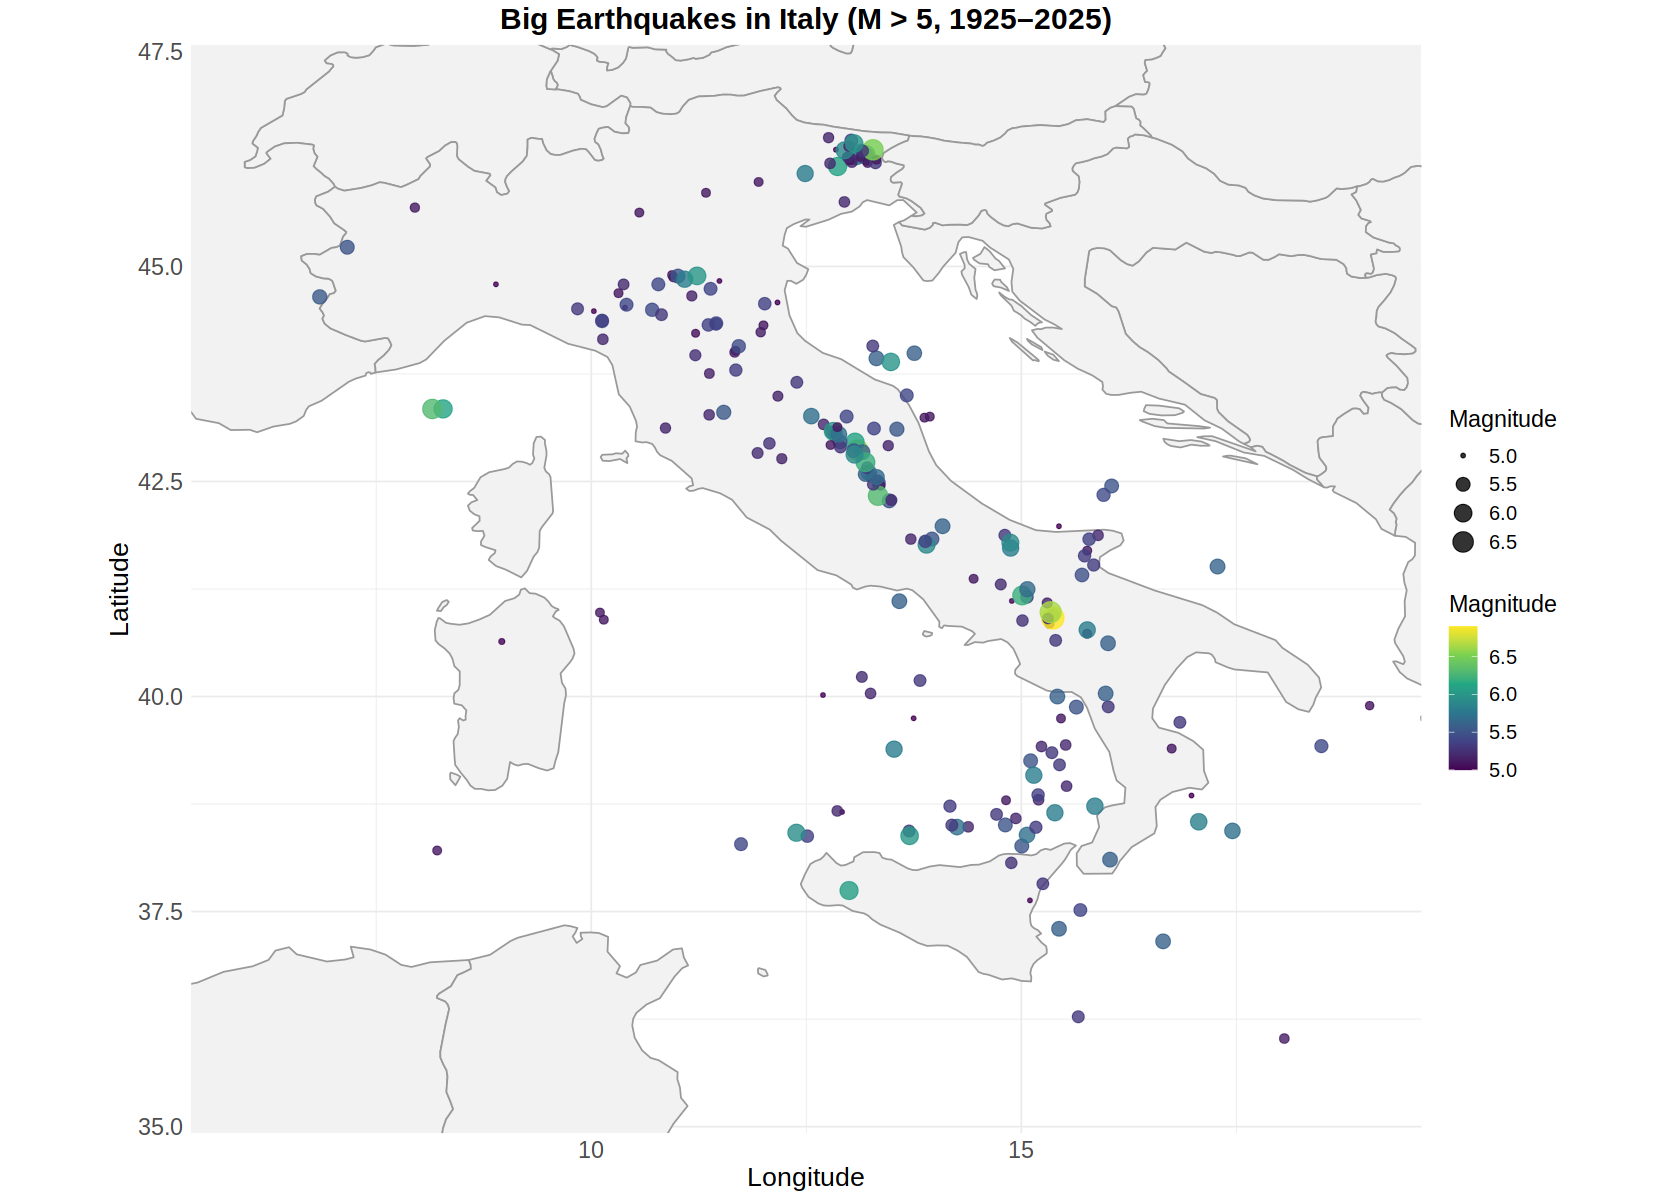

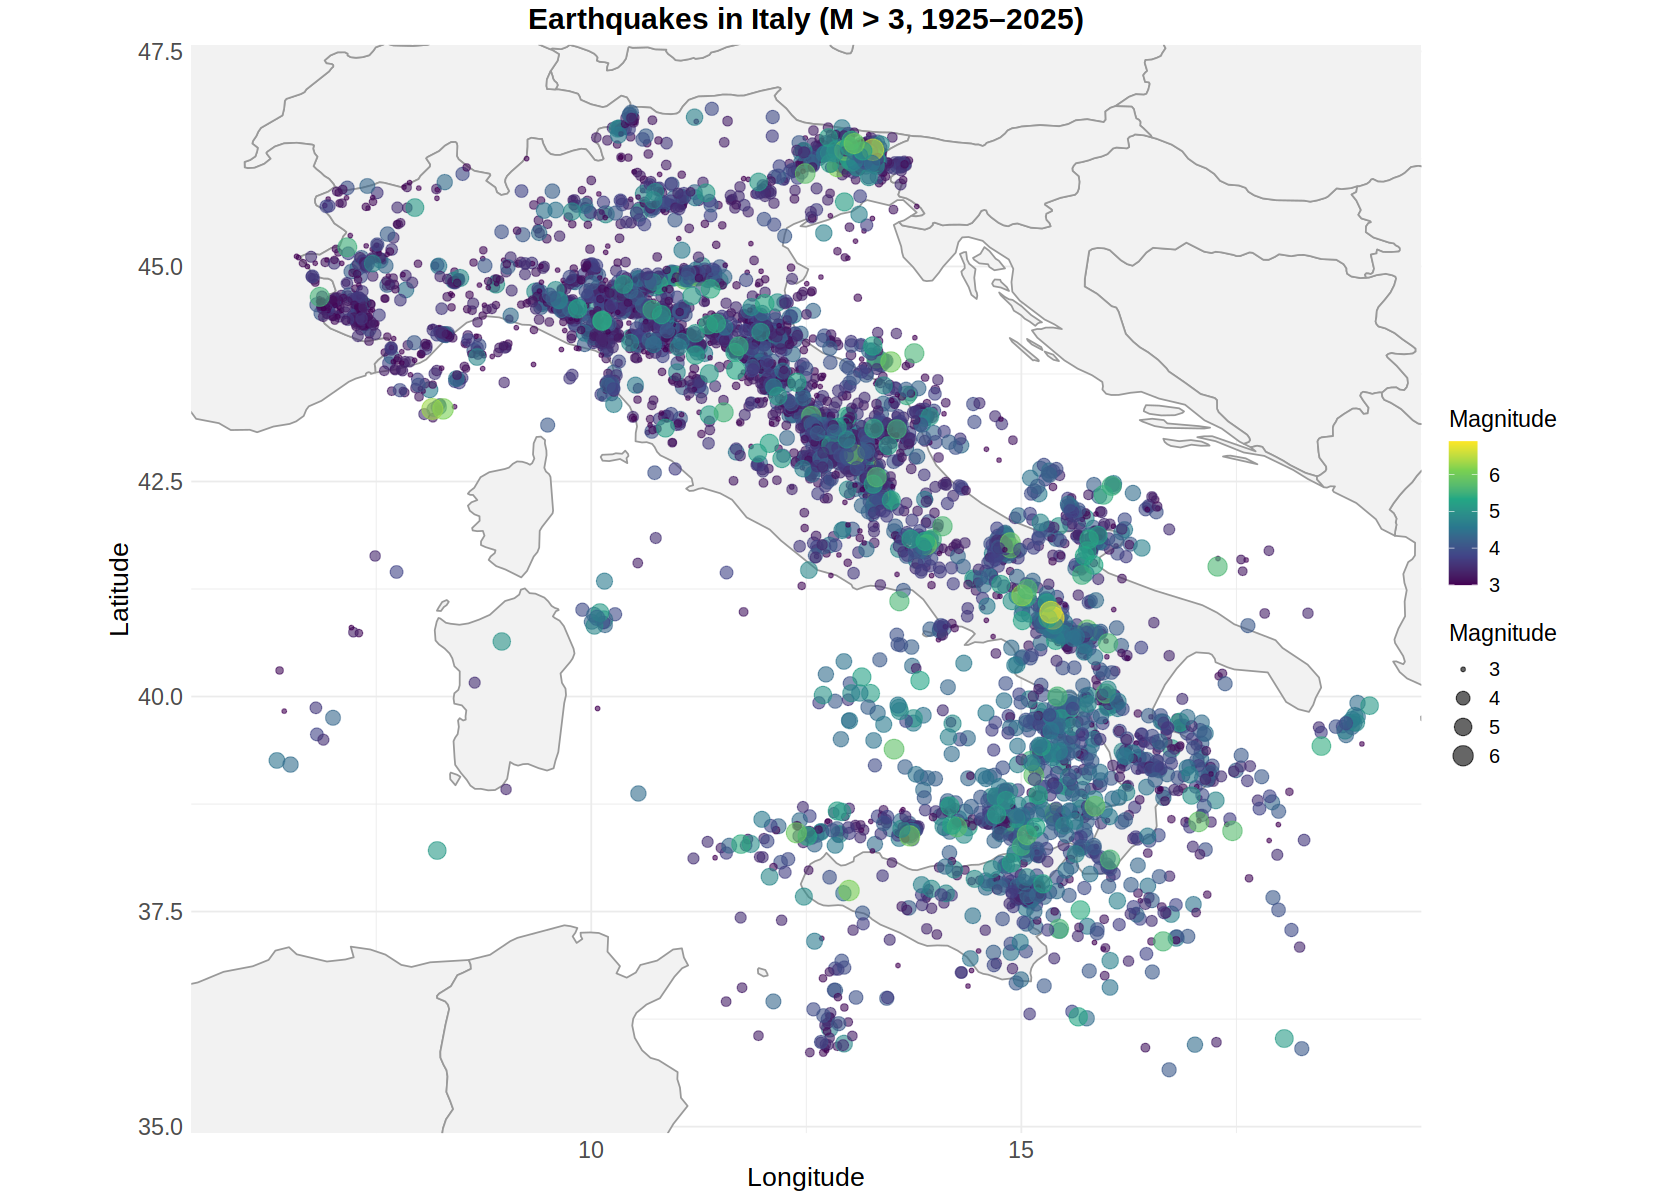

In [24]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot( df[ filt_big_magnitude & filt_italy , ] , aes(x = longitude, y = latitude)) +
  # let's draw the map outline of Italy using the "maps" package
  borders("world", regions = nations, fill = "gray95", colour = "gray60") +
  geom_point(aes(size = mag, color = mag), alpha = 0.8) +
  coord_fixed(xlim = c(6, 19), ylim = c(35.5, 47)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_color_viridis_c() +
  labs(title = "Big Earthquakes in Italy (M > 5, 1925–2025)",
       x = "Longitude", y = "Latitude", color = "Magnitude", size = "Magnitude") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14),
       legend.title = element_text(size = 14), legend.text  = element_text(size = 12))

ggsave("./images/eq_map.png", plot = last_plot(), bg = "white")

ggplot( df[ (df$mag >=3) & filt_italy , ] , aes(x = longitude, y = latitude)) +
  # let's draw the map outline of Italy using the "maps" package
  borders("world", regions = nations, fill = "gray95", colour = "gray60") +
  geom_point(aes(size = mag, color = mag), alpha = 0.6) +
  coord_fixed(xlim = c(6, 19), ylim = c(35.5, 47)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_color_viridis_c() +
  labs(title = "Earthquakes in Italy (M > 3, 1925–2025)",
       x = "Longitude", y = "Latitude", color = "Magnitude", size = "Magnitude") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14),
       legend.title = element_text(size = 14), legend.text  = element_text(size = 12))


#### DENSITY PLOT

Warning message:
“The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead.”


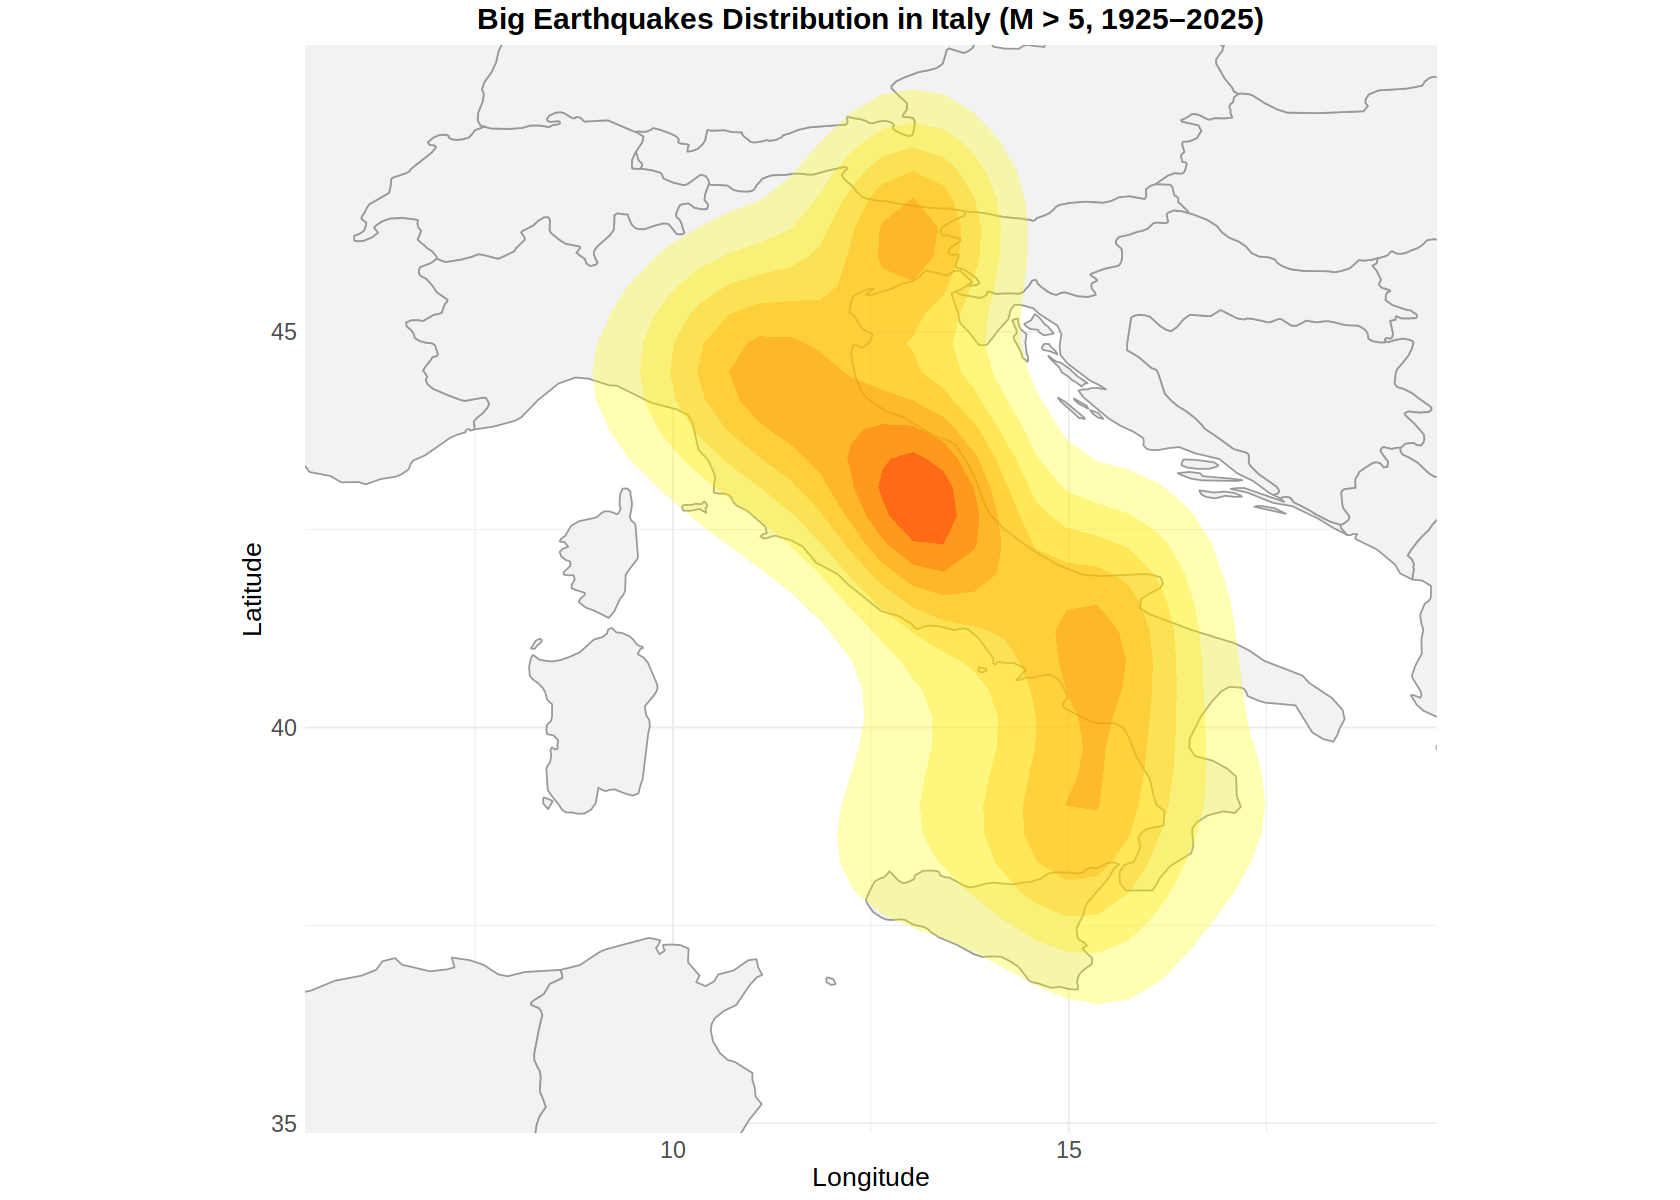

In [9]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot( df[ filt_big_magnitude & filt_italy, ] , aes(x = longitude, y = latitude)) +
  borders("world", regions = nations, fill = "gray95", colour = "gray60") +
  stat_density_2d(aes(fill = ..level..), geom = "polygon", alpha = 0.3) +
  coord_fixed(xlim = c(6, 19), ylim = c(35.5, 48)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_fill_gradient(low = "yellow", high = "red", guide='none') +
  labs(title = "Big Earthquakes Distribution in Italy (M > 5, 1925–2025)", x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )


### YEAR DISTRIBUTION

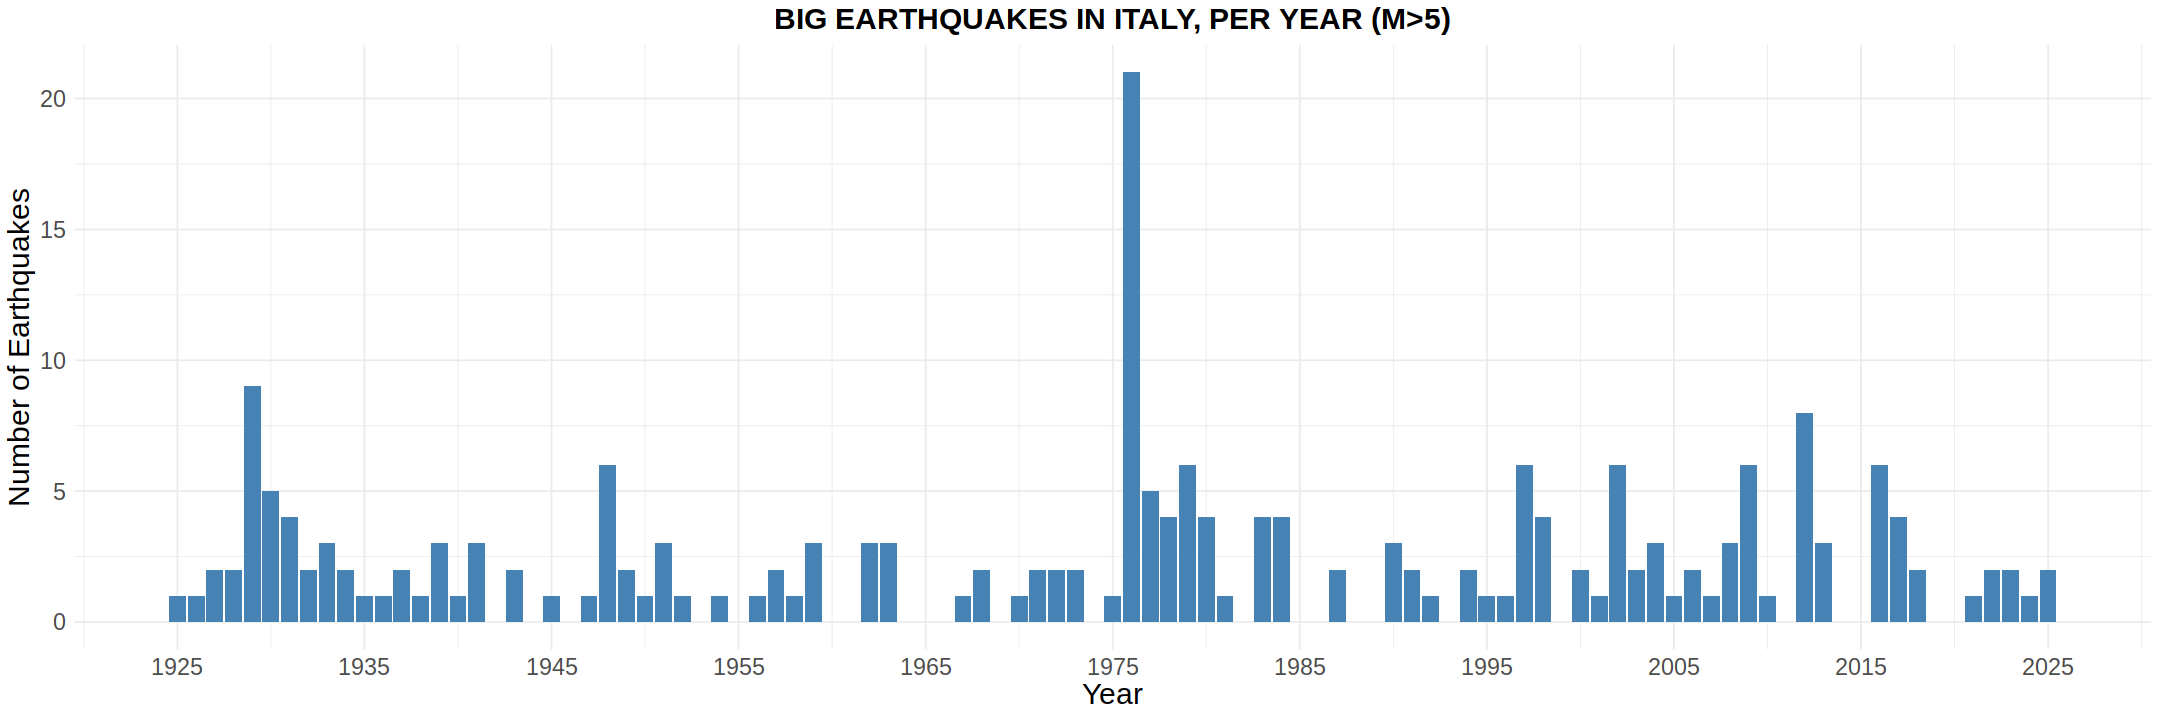

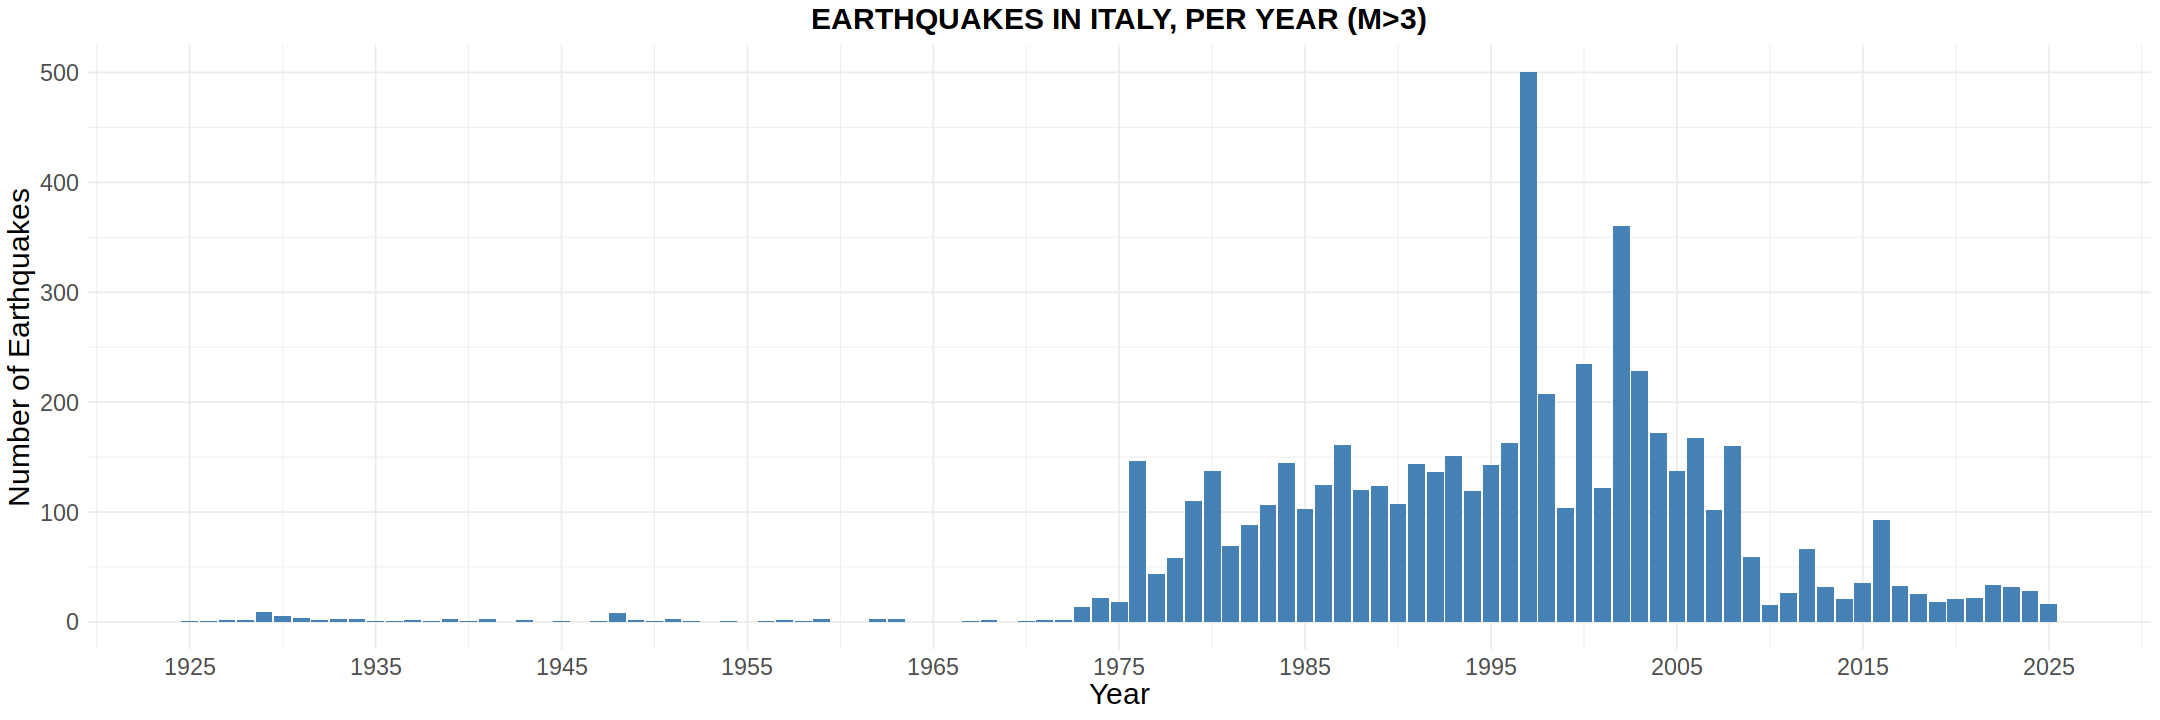

In [25]:
# let's count the number of earthquakes per year:
options(repr.plot.width=18, repr.plot.height=6)


# PLOT FOR ITALY AND BIG EARTHQUAKES:
yearly_counts_it <- df[ filt_big_magnitude & filt_italy ,] %>%
  group_by(year) %>%
  summarise( n = n() )

ggplot(yearly_counts_it, aes(x = as.numeric(year), y = n)) +
  geom_col(fill = "steelblue") +
  labs(x = "Year", y = "Number of Earthquakes", title='BIG EARTHQUAKES IN ITALY, PER YEAR (M>5)') +
  scale_x_continuous(breaks = seq(1925, 2025, by = 10)) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

# PLOT FOR ITALY:
yearly_counts <- df[ (df$mag >=3) & filt_italy ,] %>%
  group_by(year) %>%
  summarise( n = n() )

ggplot(yearly_counts, aes(x = as.numeric(year), y = n)) +
  geom_col(fill = "steelblue") +
  labs(x = "Year", y = "Number of Earthquakes", title='EARTHQUAKES IN ITALY, PER YEAR (M>3)') +
  scale_x_continuous(breaks = seq(1925, 2025, by = 10)) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

There are many more earthquake registered from 1973 onwards. Our guess is that the reason is better technology.

### MONTH DISTRIBUTION

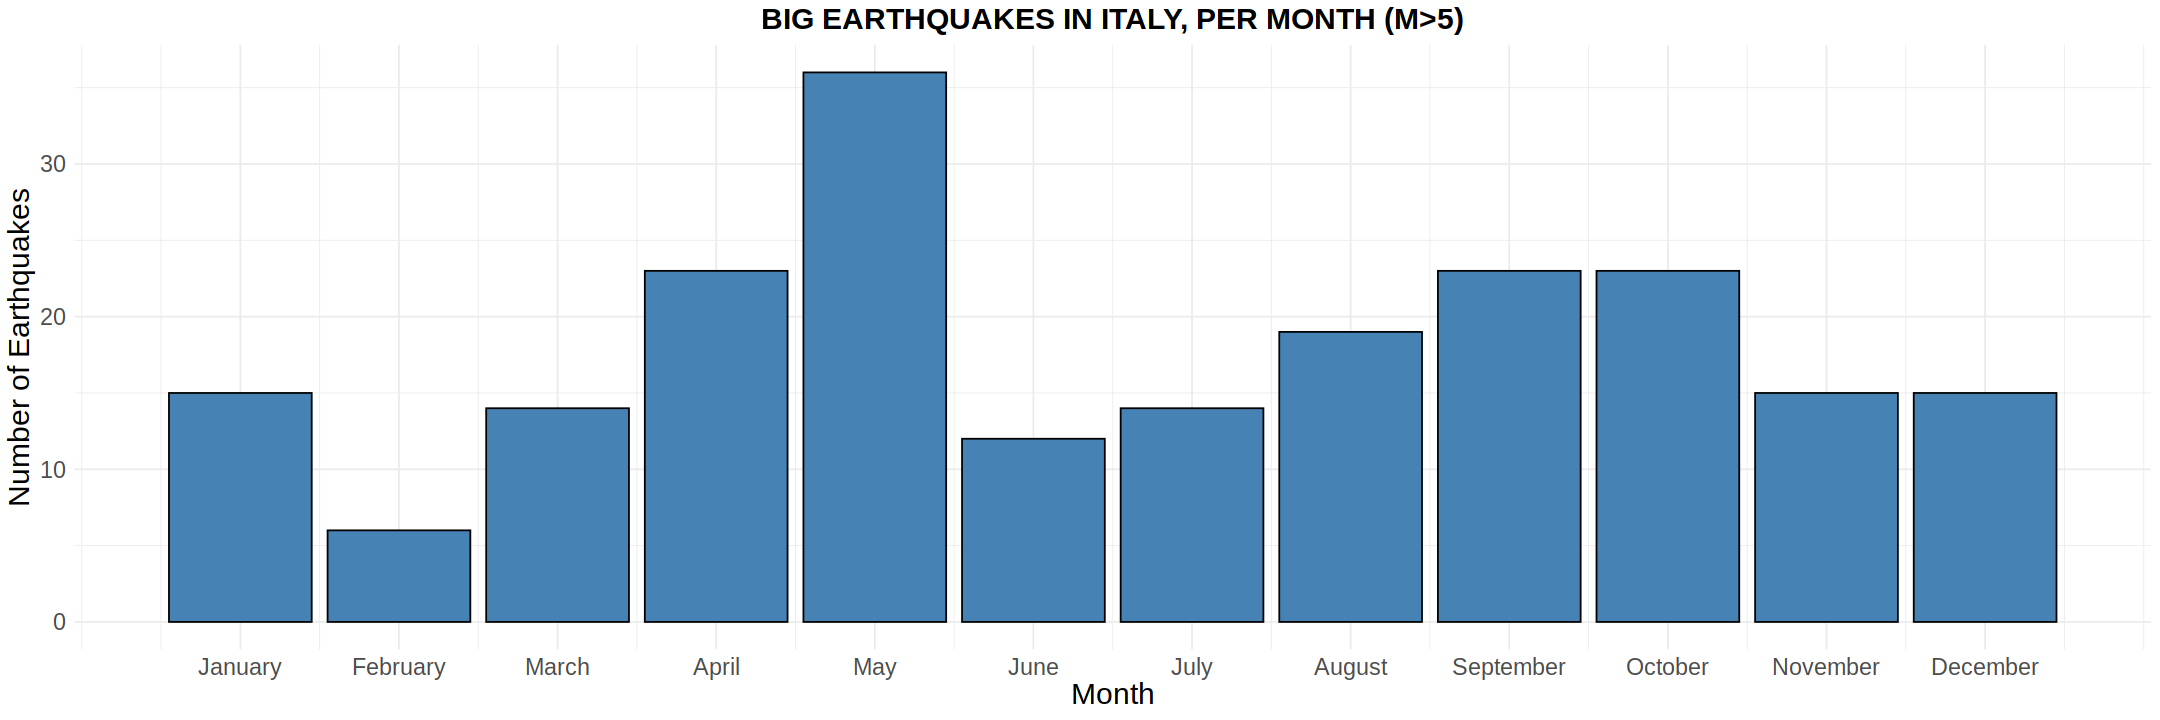

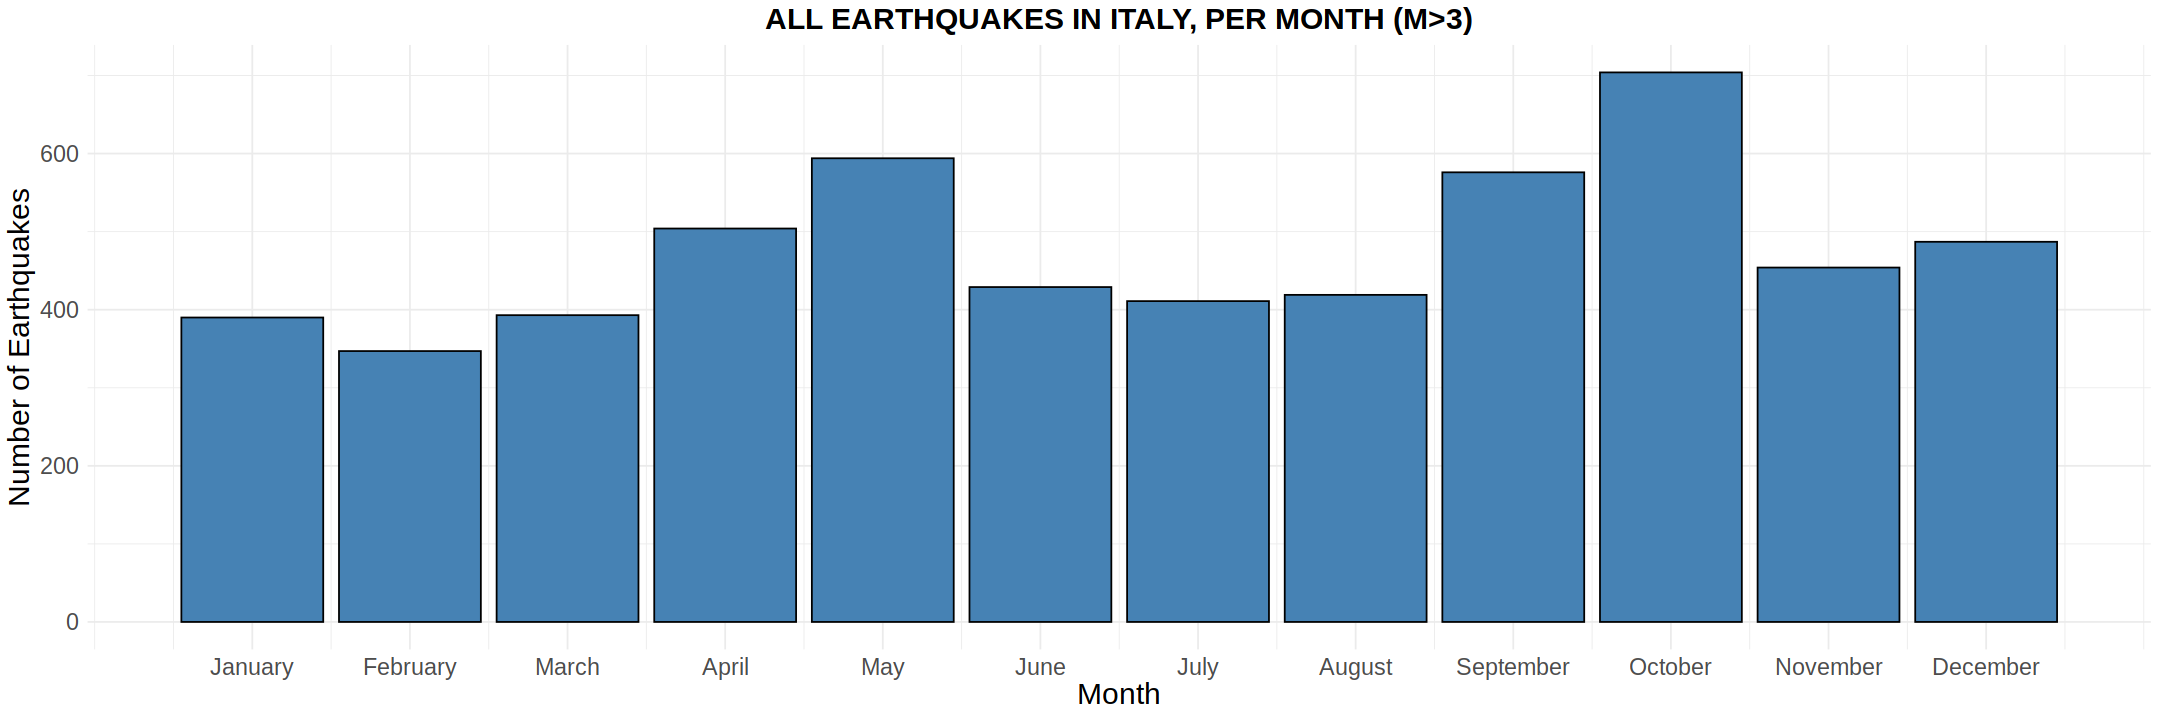

In [11]:
# let's count the number of earthquakes per year:
options(repr.plot.width=18, repr.plot.height=6)
months <- c("January", "February", "March", "April", "May", "June", 
            "July", "August", "September", "October", "November", "December")


# PLOT FOR ITALY AND BIG EARTHQUAKES:
monthly_counts_it <- df[ filt_big_magnitude & filt_italy ,] %>%
  group_by(month) %>%
  summarise( n = n() )

ggplot(monthly_counts_it, aes(x = as.numeric(month), y = n)) +
  geom_col(fill = "steelblue", color = "black") +
  labs(x = "Month", y = "Number of Earthquakes", title='BIG EARTHQUAKES IN ITALY, PER MONTH (M>5)') +
  scale_x_continuous( breaks = 1:12, labels = months ) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

# PLOT FOR ITALY:
monthly_counts <- df[ (df$mag >=3) & filt_italy ,] %>%
  group_by(month) %>%
  summarise( n = n() )

ggplot(monthly_counts, aes(x = as.numeric(month), y = n)) +
  geom_col(fill = "steelblue", color = "black") +
  labs(x = "Month", y = "Number of Earthquakes", title='ALL EARTHQUAKES IN ITALY, PER MONTH (M>3)') +
  scale_x_continuous( breaks = 1:12, labels = months ) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

There is no evident seasonal ditribution.

### DEPTH DISTRIBUTION
Let's study the depth distribution of the earthquakes.

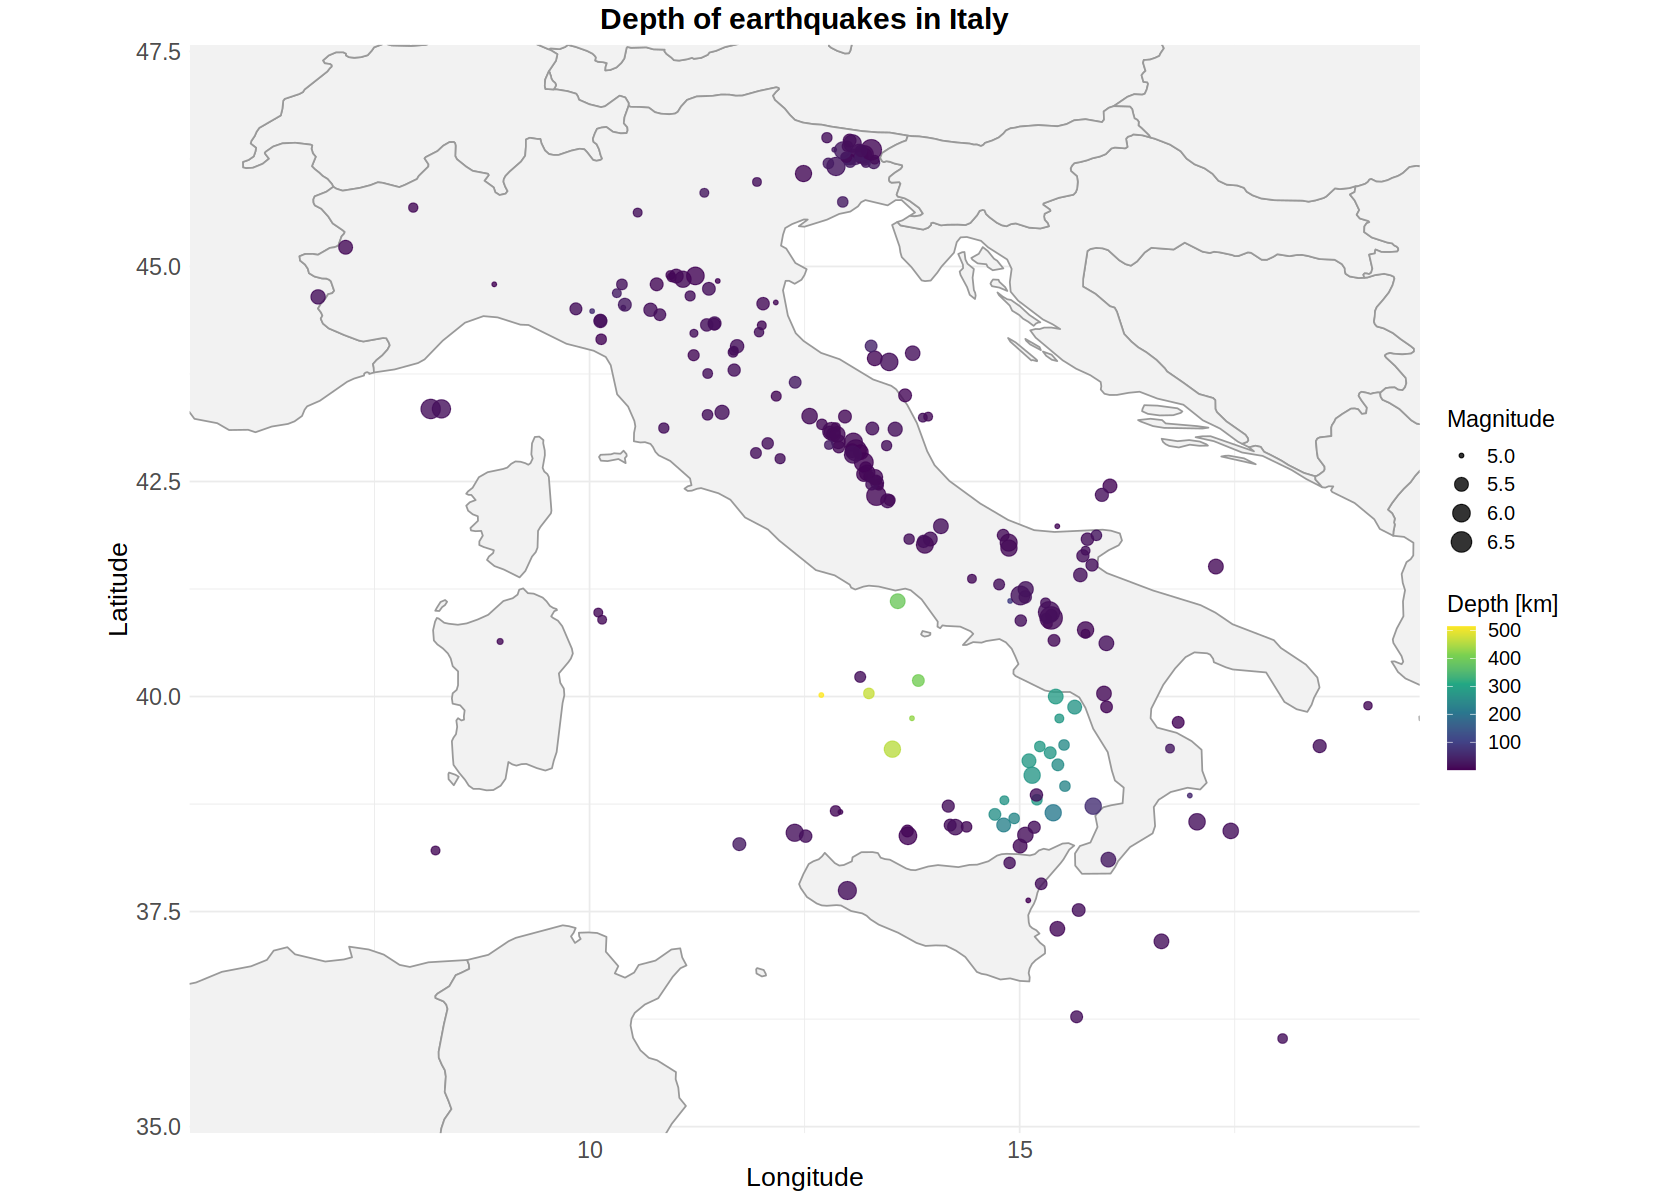

In [12]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot( df[ filt_big_magnitude & filt_italy , ] , aes(x = longitude, y = latitude)) +
  # let's draw the map outline of Italy using the "maps" package
  borders("world", 
          regions = c("Italy", "Germany", "Switzerland", "France", "Austria", "Slovenia", "Croatia", 
                      "Greece", "Albania", 'Bosnia and Herzegovina', 'Hungary', 'Slovakia', 'Liechtenstein', 'Montenegro', 
                      'Serbia', 'Kosovo', 'Romania', 'North Macedonia', 'Tunisia', 'Algeria'), 
          fill = "gray95", colour = "gray60") +
  geom_point(aes(size = mag, color = depth), alpha = 0.8) +
  coord_fixed(xlim = c(6, 19), ylim = c(35.5, 47)) +    #  ensures the aspect ratio is preserved, so the map doesn’t look stretched
  scale_color_viridis_c() +
  labs(title = "Depth of earthquakes in Italy",
       x = "Longitude", y = "Latitude", color = "Depth [km]", size = "Magnitude") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14),
       legend.title = element_text(size = 14), legend.text  = element_text(size = 12))


It's clear the presence of a deep seismic active zone between Sicilia and Calabria regions. Let's study better the depth distribution:

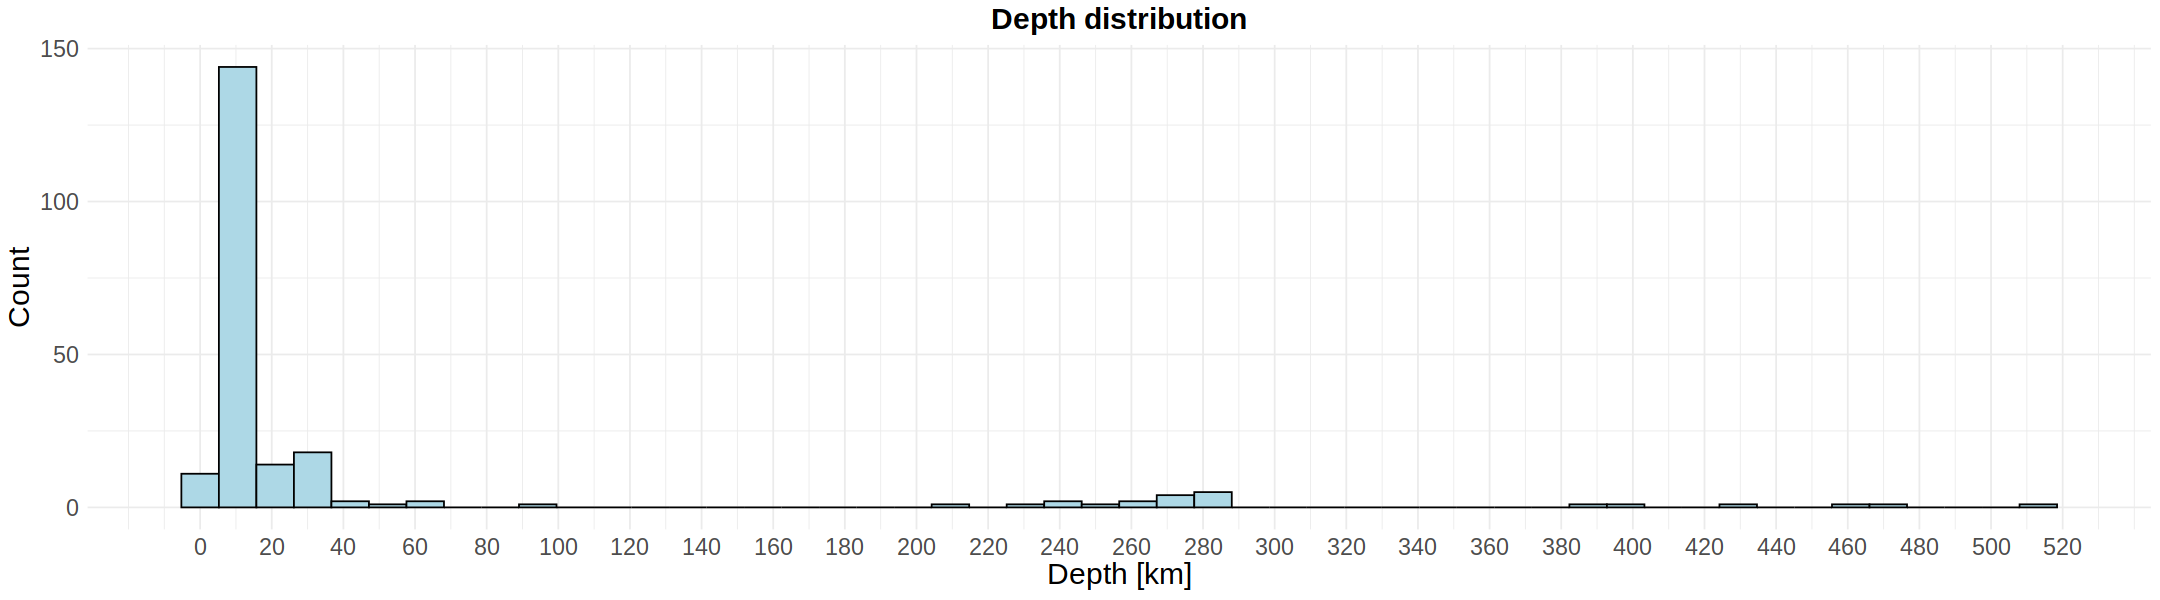

In [13]:
options(repr.plot.width=18, repr.plot.height=5)

ggplot(  df[ filt_big_magnitude & filt_italy , ], aes(x = depth)) +
  geom_histogram(bins = 50, fill = "lightblue", color = "black") +
  labs(title = "Depth distribution", x = "Depth [km]", y = "Count") +
  scale_x_continuous(breaks = seq(0, 520, by = 20)) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

We can identify three main depth zones:
* 0-100 km, with a peak at low depth
* 200-300 km
* 380-520 km

The last two zones coincide exactly with the high depth zone seen in the map.

The deep earthquakes we see in the sea northwest of Sicily and west of Calabria are almost certainly due to the subduction of the Ionian plate beneath the Calabrian arc. This area is one of Europe’s most active deep seismic zones, and its depth pattern strongly supports the presence of a steeply dipping, active subduction zone. This conncets with notorious volanos in the zone (Vesuvio, Etna, Stromboli, Vulcano...).

### YEARLY DISTRIBTUION OF DEPTH

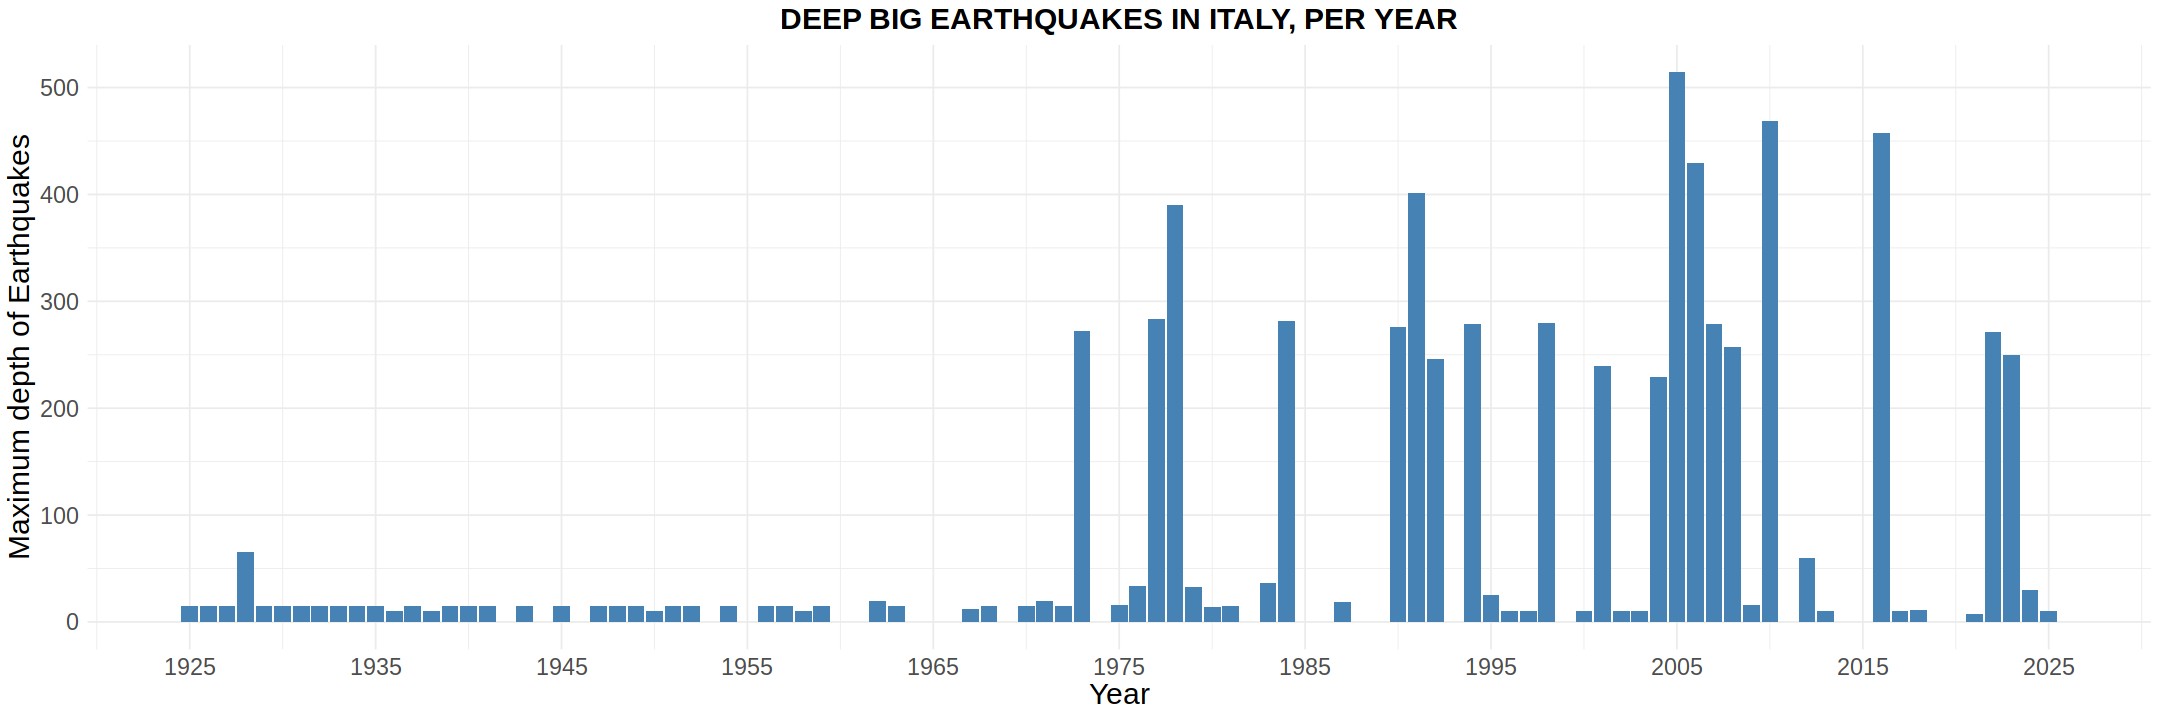

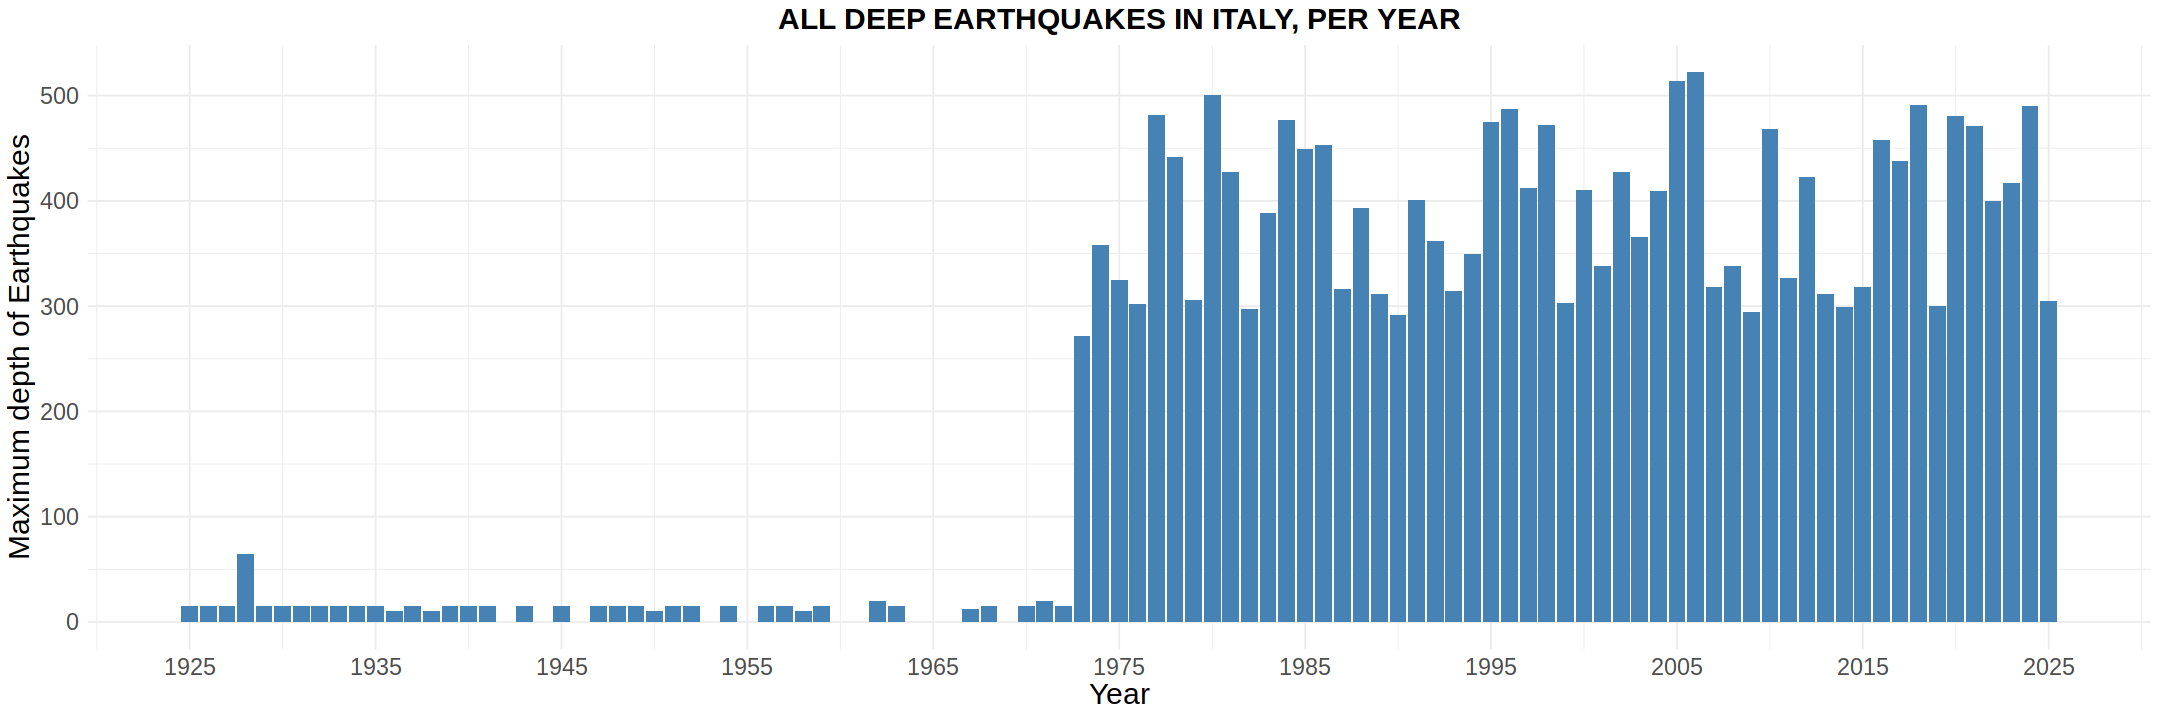

In [14]:
# let's count the number of earthquakes per year:
options(repr.plot.width=18, repr.plot.height=6)


# PLOT FOR ITALY AND BIG EARTHQUAKES:
depth_yearly_it <- df[ filt_big_magnitude & filt_italy ,] %>%
  group_by(year) %>%
  summarise( max = max(depth) )

ggplot(depth_yearly_it, aes(x = as.numeric(year), y = max)) +
  geom_col(fill = "steelblue") +
  labs(x = "Year", y = "Maximum depth of Earthquakes", title='DEEP BIG EARTHQUAKES IN ITALY, PER YEAR') +
  scale_x_continuous(breaks = seq(1925, 2025, by = 10)) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

# PLOT FOR ITALY:
depth_yearly <- df[ filt_italy ,] %>%
  group_by(year) %>%
  summarise( max = max(depth) )

ggplot(depth_yearly, aes(x = as.numeric(year), y = max)) +
  geom_col(fill = "steelblue") +
  labs(x = "Year", y = "Maximum depth of Earthquakes", title='ALL DEEP EARTHQUAKES IN ITALY, PER YEAR') +
  scale_x_continuous(breaks = seq(1925, 2025, by = 10)) +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

Deep earthquakes in Italy are only recorded from 1973 onward, likely reflecting improved seismic monitoring. Further analysis would be needed to determine whether this reflects a true onset of activity or increased detection capability. 

---

# CORRELATION BETWEEN VARIABLES

In [15]:
# Select relevant numeric columns:
df_cor <- df[ filt_italy, c("time", "depth", "longitude", "latitude", "mag")]
df_cor$time <- as.numeric(df_cor$time)  # change time to numeric value (seconds since 1970-01-01)

# Compute correlation matrix
cor_matrix <- cor( df_cor, use = "complete.obs", method = "pearson")

# Print matrix
print(cor_matrix)

                 time       depth  longitude   latitude        mag
time       1.00000000  0.03825062  0.1018529 -0.2179180 -0.2304907
depth      0.03825062  1.00000000  0.2204782 -0.2587400  0.2465967
longitude  0.10185288  0.22047823  1.0000000 -0.6730538  0.2632089
latitude  -0.21791803 -0.25873996 -0.6730538  1.0000000 -0.1089581
mag       -0.23049074  0.24659668  0.2632089 -0.1089581  1.0000000


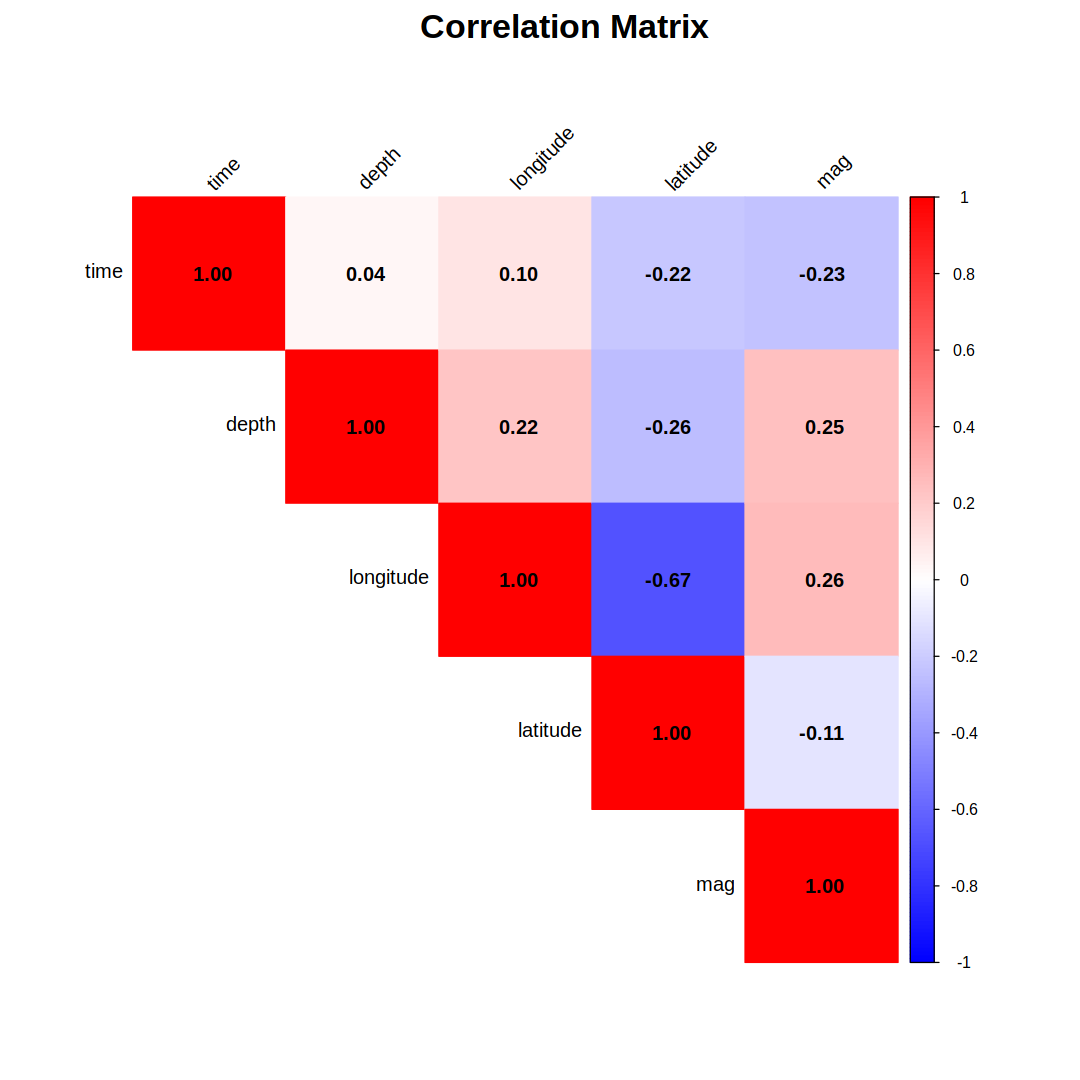

In [16]:
# PLOT HEATMAP:
options(repr.plot.width=9, repr.plot.height=9)

# Plot the correlation matrix
corrplot(cor_matrix,
         method = "color",
         type = "upper",              # shows only the upper triangle of the matrix
         addCoef.col = "black",       # adds the actual correlation coefficient values on top of each square, in black
         tl.col = "black",            # label color
         tl.srt = 45,                 # label rotation (45 degrees)
         col = colorRampPalette(c("blue", "white", "red"))(200)
)
title("Correlation Matrix", line = 2.5, cex.main=1.7)

The strongest (anti)correlation is observed between latitude and longitude, likely reflecting the geographical alignment of the Apennine mountain range, which follows a tectonic plate boundary.

`geom_smooth()` using formula = 'y ~ x'


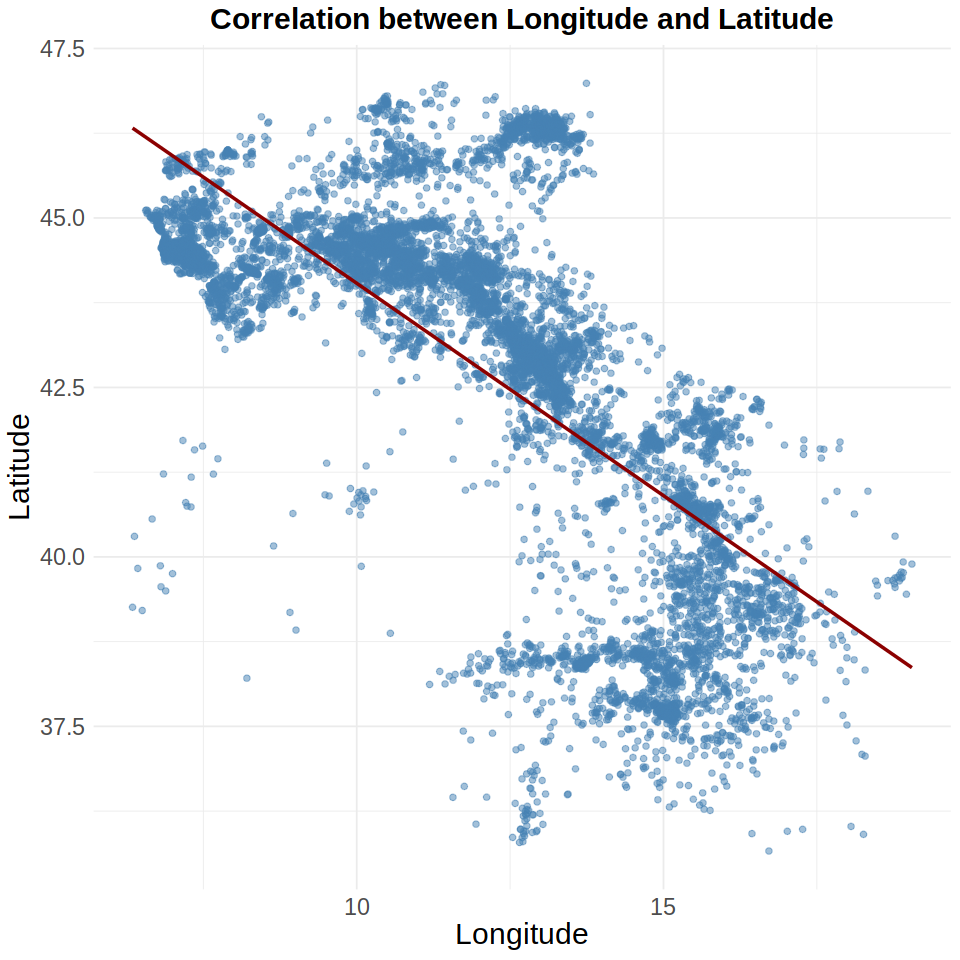

In [17]:
# PLOT:
options(repr.plot.width=8, repr.plot.height=8)
ggplot( df_cor, aes(x = longitude, y = latitude)) +
  geom_point(alpha = 0.5, color = "steelblue") +
  geom_smooth(method = "lm", se = FALSE, color = "darkred") +
  labs(title = "Correlation between Longitude and Latitude",
       x = "Longitude", y = "Latitude") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


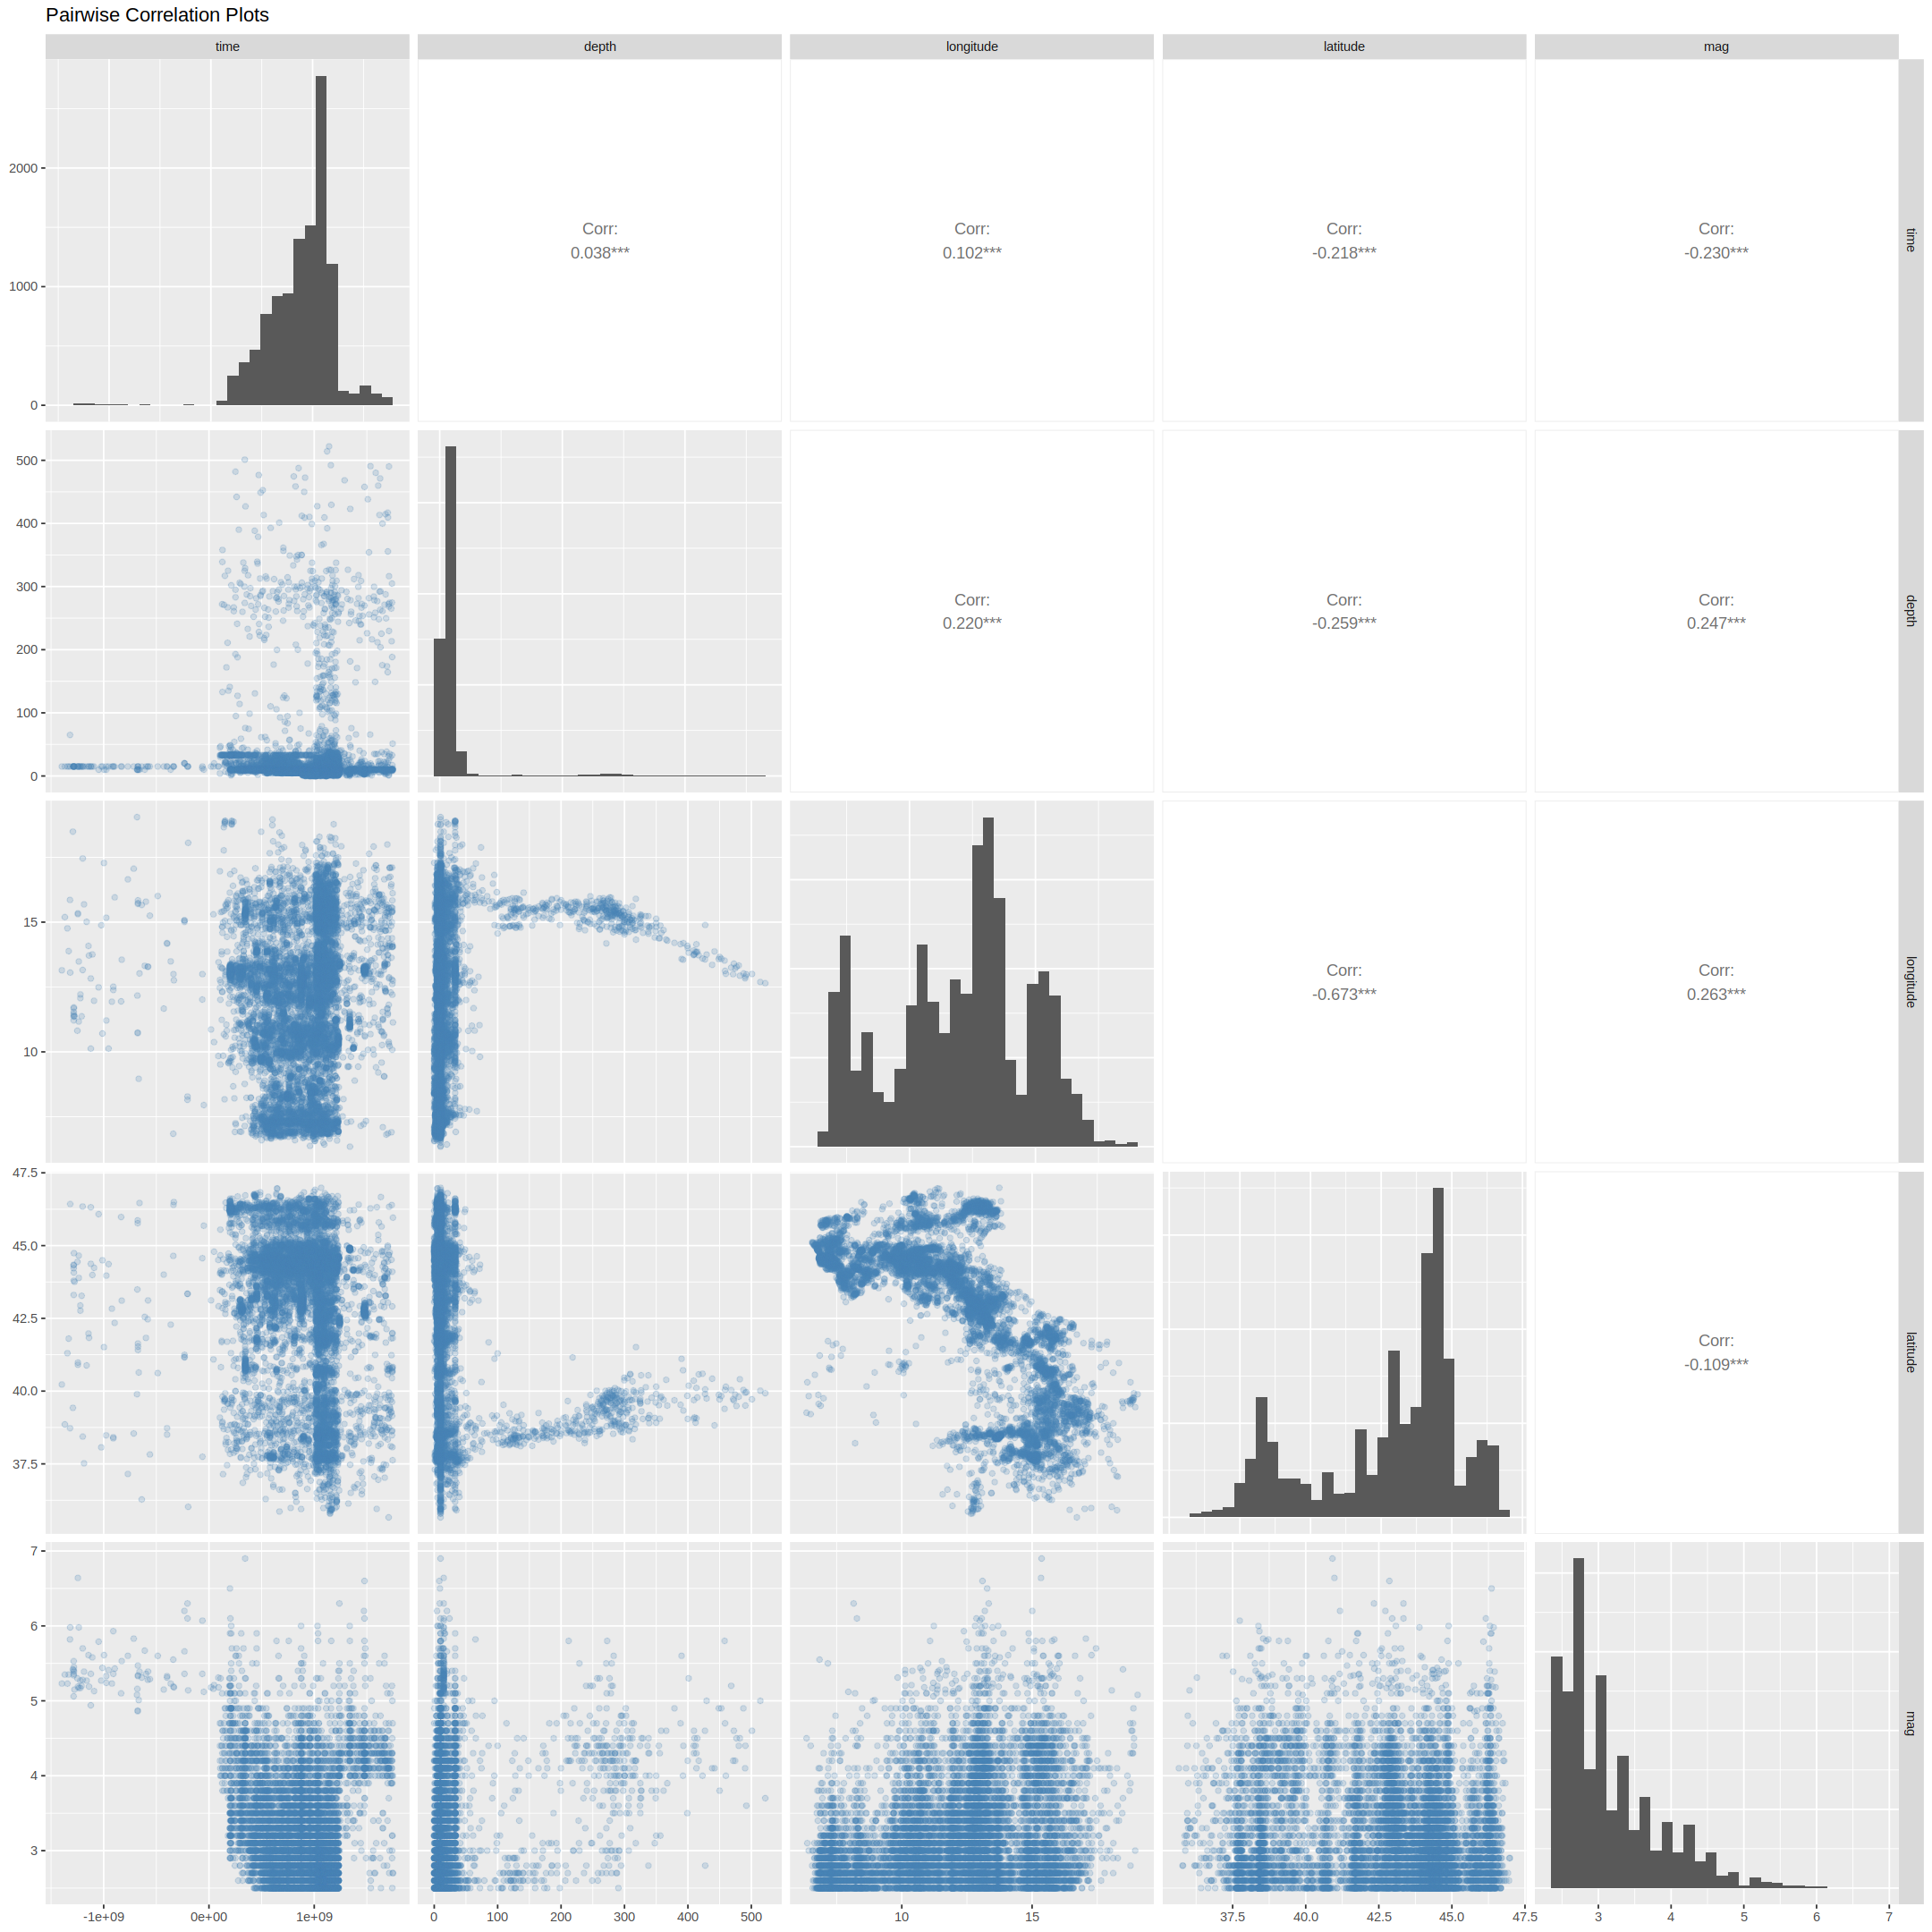

In [18]:
# Create the scatterplot matrix
options(repr.plot.width=18, repr.plot.height=18)
ggpairs(df_cor,
        title = "Pairwise Correlation Plots",
        lower = list(continuous = wrap("points", alpha = 0.2, color = "steelblue")), 
        diag = list(continuous = "barDiag"),
        upper = list(continuous = "cor"))

From the plot above, we can observe the following:
* First column: Most of the data were recorded after 1973.
* Second column: Most earthquakes occur near the surface. Some clustering appears in the latitude and longitude plots, likely due to the previously identified zones.
* Third column: Longitude is correlated with latitude, as mentioned earlier.
* Fourth row: Most earthquakes have low magnitudes.

---

# GUTENBERG-RICHTER LAW

### EXPLANATION
In seismology, the Gutenberg–Richter law (GR law) expresses the relationship between the magnitude and total number of earthquakes in any given region and time period of at least that magnitude, and is given by:
$$ log_{10} ⁡ N = a − b \cdot M $$

where $N$ is the number of events having a magnitude ≥ $M$, $a$ and $b$ are constants. The values of $a$ and $b$ may vary significantly from region to region or over time.   

#### PARAMETER $b$
The parameter $b$ is commonly close to 1.0 in seismically active regions. This means that for a given frequency of magnitude 4.0 or larger events there will be 10 times as many magnitude 3.0 or larger quakes and 100 times as many magnitude 2.0 or larger quakes. There is some variation of b-values in the approximate range of 0.5 to 2 depending on the source environment of the region. A notable example of this is during earthquake swarms when b can become as high as 2.5, thus indicating a very high proportion of small earthquakes to large ones.  Alternatively, a b-value significantly different from 1.0 may suggest a problem with the data set; e.g. it is incomplete or contains errors in calculating magnitude. 

#### PARAMETER $a$
The a-value represents the total seismicity rate of the region. This is more easily seen when the GR law is expressed in terms of the total number of events: 
$$ N = N_{TOT} \cdot 10^{-bM} $$ 
with $N_{TOT} = 10^{a}$ the total number of events. Since $10^{a}$ is the total number of events, $10^{-bM}$ must be the probability of those events. 


In [19]:
mag_values <- seq(5,7,0.1)  # groups of magnitudes (one every 0.1)
y_counts <- c()             # empty for now. It will count how many earthquakes there are in each group of magnitude

for (i_mag in mag_values) {
    count <- df[  filt_italy ,] %>%
        filter( mag >= i_mag )%>%
        summarize( count= n() ) %>%
        pull(count)  # extract the number instead of returning a dataframe
    y_counts <- append(y_counts, count)
    }
y_counts

[1] 215 198 154 123  85  71  54  40  32  24  16  11   8   6   4   4   3   1   1
[20]   1   0

`geom_smooth()` using formula = 'y ~ x'


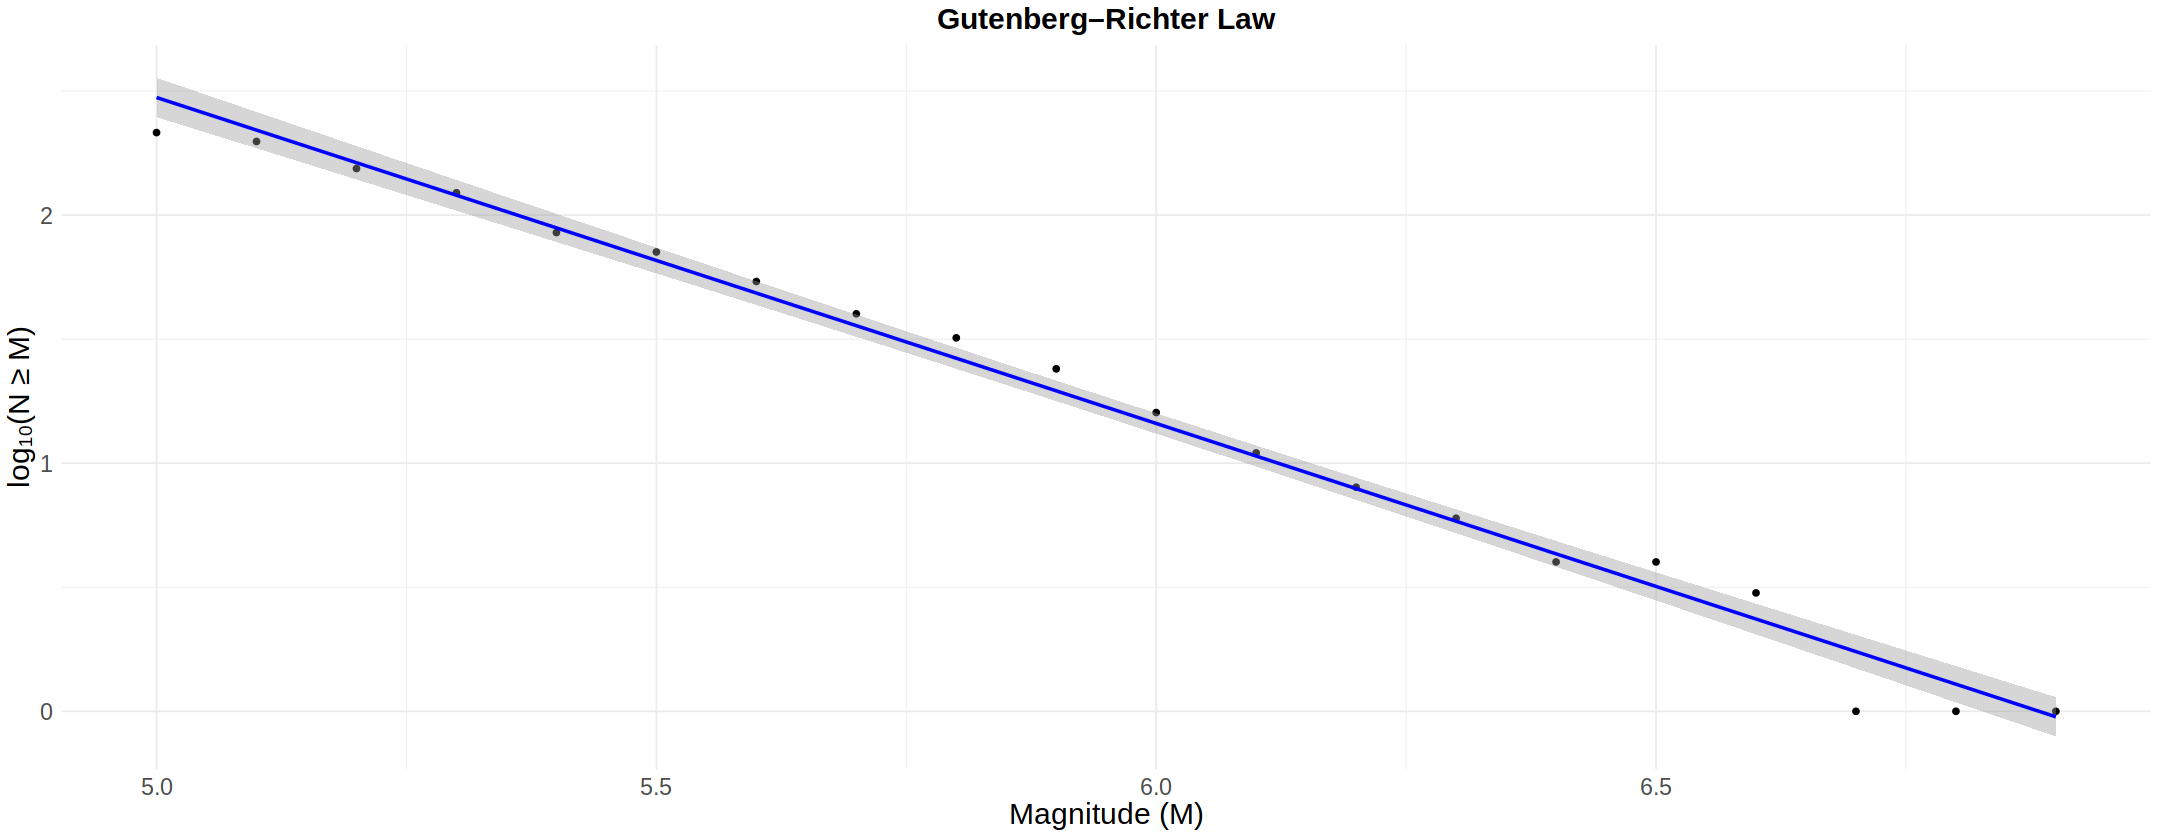

In [20]:
# let's create a dataframe with results for the PLOT
gut_rich <- data.frame(
    mag_lim = mag_values,
    y_counts = y_counts
)

# let's create a filter to exclude the case of log10(0):
gut_rich_clean <- gut_rich[ gut_rich$y_counts > 0, ]

options(repr.plot.width=18, repr.plot.height=7)
ggplot(gut_rich_clean, aes(x = mag_lim, y = log10(y_counts))) +
  geom_point() +
  geom_smooth(method = "lm", color = "blue") +
  labs(title = "Gutenberg–Richter Law",
       x = "Magnitude (M)",
       y = "log₁₀(N ≥ M)") +
  theme_minimal() +
  theme( plot.title = element_text(size = 18, hjust = 0.5, face = "bold"),
       axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18),
       axis.text.x = element_text(size = 14), axis.text.y = element_text(size = 14)  )

In [21]:
model <- lm(log10(y_counts) ~ mag_lim, data = gut_rich_clean)

coeffs <- coef(model)
ci <- confint(model)
a <- coeffs[1]        # intercept
b <- -coeffs[2]       # negative slope, because of how it is defined (see law definition)

cat("Estimated a:", a, "\n")
cat("95% CI for a (intercept):", ci[1,1], "to", ci[1,2], "\n\n")
cat("Estimated b:", b, "\n")
cat("95% CI for b (slope):", -ci[2,2], "to", -ci[2,1], "\n")  # remember to flip the sign

Estimated a: 9.042364 
95% CI for a (intercept): 8.616194 to 9.468533 

Estimated b: 1.313716 
95% CI for b (slope): 1.242425 to 1.385007 


A b-value around 1 is typical globally; this slightly higher value suggests a higher proportion of small earthquakes compared to large ones.

---